In [1]:
import sys
import os
import numpy as np
import matplotlib
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
####### this makes the division in the pandas dataframe not result in whole numbers 
from __future__ import division
from snowpack_functions import mesh_gridify,make_map
# basins = ["california"]


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


saving figure to '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/RD_TR_SD_histogram.png'


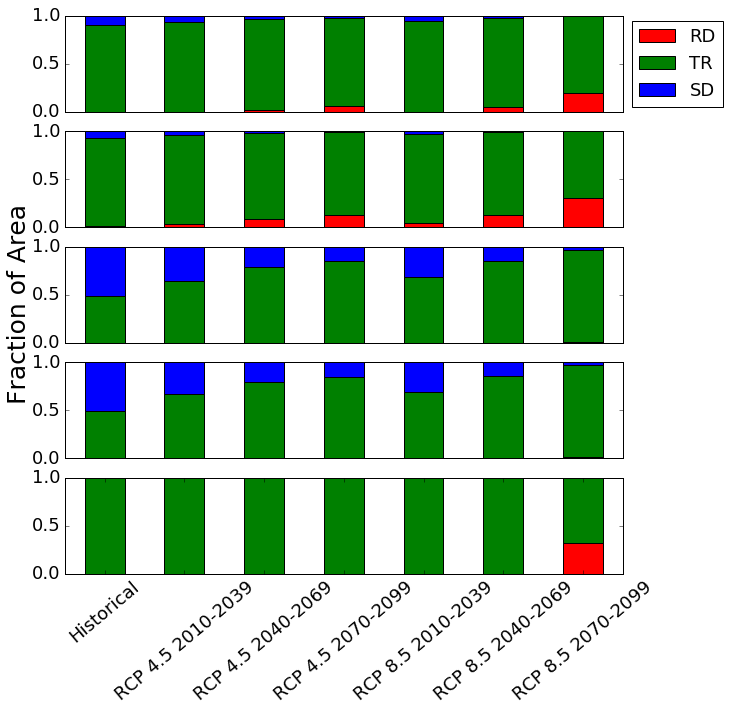

In [2]:
basins = ["cascades","california","northernrockies","southernrockies","whites"]
colors = ['r','g','b','c','y']
count = 0
# fig = plt.figure(figsize=(20,20))
fig, axes = plt.subplots(figsize=(10,10),nrows=5, ncols=1)

######################### set fontsize #####################
fs = 25
ls = 18
############################################################

lw = 2.0
num = 0

for basin in basins: 
    ## historical
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"historical")
    data = np.load(file)
    temp_avg_hist = data['temp_avg']
    precip_hist = data['precip']
    swe_hist = data['swe']
    ## rcp4.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp45")
    data = np.load(file)
    swe_2010_2039_rcp45 = data['swe_2010_2039']
    swe_2040_2069_rcp45 = data['swe_2040_2069']
    swe_2070_2099_rcp45 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp45 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp45 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp45 = data['temp_avg_2070_2099']
    ## rcp8.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp85")
    data = np.load(file)
    swe_2010_2039_rcp85 = data['swe_2010_2039']
    swe_2040_2069_rcp85 = data['swe_2040_2069']
    swe_2070_2099_rcp85 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp85 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp85 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp85 = data['temp_avg_2070_2099']
    ####################### bin by temperature and change classification in the future ############################
    ## hist class
    ## snow dominant
    rd_cut = 278.15
    sd_cut = 267.15
    swe_sd_hist = swe_hist[temp_avg_hist <= sd_cut]
    ## transient
    swe_tr_hist = swe_hist[(temp_avg_hist > sd_cut) & (temp_avg_hist < rd_cut)]
    ## rain dominant
    swe_rd_hist = swe_hist[temp_avg_hist >= rd_cut]

    ## rcp45
    ## snow dominant
    swe_sd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 <= sd_cut]
    swe_sd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 <= sd_cut]
    swe_sd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 <= sd_cut]

    ## transient
    swe_tr_2010_2039_rcp45 = swe_2010_2039_rcp45[(temp_avg_2010_2039_rcp45 > sd_cut) & (temp_avg_2010_2039_rcp45 < rd_cut)]
    swe_tr_2040_2069_rcp45 = swe_2040_2069_rcp45[(temp_avg_2040_2069_rcp45 > sd_cut) & (temp_avg_2040_2069_rcp45 < rd_cut)]
    swe_tr_2070_2099_rcp45 = swe_2070_2099_rcp45[(temp_avg_2070_2099_rcp45 > sd_cut) & (temp_avg_2070_2099_rcp45 < rd_cut)]


    ## rain dominant
    swe_rd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 >= rd_cut]
    swe_rd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 >= rd_cut]
    swe_rd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 >= rd_cut]


    ## rcp85
    ## snow dominant
    swe_sd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 <= sd_cut]
    swe_sd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 <= sd_cut]
    swe_sd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 <= sd_cut]
    ## transient
    swe_tr_2010_2039_rcp85 = swe_2010_2039_rcp85[(temp_avg_2010_2039_rcp85 > sd_cut) & (temp_avg_2010_2039_rcp85 < rd_cut)]
    swe_tr_2040_2069_rcp85 = swe_2040_2069_rcp85[(temp_avg_2040_2069_rcp85 > sd_cut) & (temp_avg_2040_2069_rcp85 < rd_cut)]
    swe_tr_2070_2099_rcp85 = swe_2070_2099_rcp85[(temp_avg_2070_2099_rcp85 > sd_cut) & (temp_avg_2070_2099_rcp85 < rd_cut)]

    ## rain dominant
    swe_rd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 >= rd_cut]
    swe_rd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 >= rd_cut]
    swe_rd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 >= rd_cut]


    ################################################### BAR GRAPH #####################################################
    ## RD, TR, SD 
    # ax[num+1] = fig.add_subplot(5,2,num + 1)
    ## totals: swe_hist, swe_2010_2039_rcp45
    df1 = pd.DataFrame([[len(swe_rd_hist)/len(swe_hist),len(swe_tr_hist)/len(swe_hist),len(swe_sd_hist)/len(swe_hist)],
                       [len(swe_rd_2010_2039_rcp45)/len(swe_2010_2039_rcp45),len(swe_tr_2010_2039_rcp45)/len(swe_2010_2039_rcp45),len(swe_sd_2010_2039_rcp45)/len(swe_2010_2039_rcp45)],
                       [len(swe_rd_2040_2069_rcp45)/len(swe_2040_2069_rcp45),len(swe_tr_2040_2069_rcp45)/len(swe_2040_2069_rcp45),len(swe_sd_2040_2069_rcp45)/len(swe_2040_2069_rcp45)],
                       [len(swe_rd_2070_2099_rcp45)/len(swe_2070_2099_rcp45),len(swe_tr_2070_2099_rcp45)/len(swe_2070_2099_rcp45),len(swe_sd_2070_2099_rcp45)/len(swe_2070_2099_rcp45)], 
                        [len(swe_rd_2010_2039_rcp85)/len(swe_2010_2039_rcp85),len(swe_tr_2010_2039_rcp85)/len(swe_2010_2039_rcp85),len(swe_sd_2010_2039_rcp85)/len(swe_2010_2039_rcp85)],
                       [len(swe_rd_2040_2069_rcp85)/len(swe_2040_2069_rcp85),len(swe_tr_2040_2069_rcp85)/len(swe_2040_2069_rcp85),len(swe_sd_2040_2069_rcp85)/len(swe_2040_2069_rcp85)],
                       [len(swe_rd_2070_2099_rcp85)/len(swe_2070_2099_rcp85),len(swe_tr_2070_2099_rcp85)/len(swe_2070_2099_rcp85),len(swe_sd_2070_2099_rcp85)/len(swe_2070_2099_rcp85)]], 
                       columns = ['RD','TR','SD'])
    # df1.plot(ax=ax[num+1],kind = 'bar', stacked=True)
    ax1 = df1.plot(kind = 'bar', stacked=True,ax=axes[num],color=['r', 'g', 'b'],legend=False if num != 0 else True,)
    if num == 0:
        ax1.legend(loc='center left',prop={'size':ls},bbox_to_anchor=(1, 0.5))
    if (basin == "whites"):
        x = [0,1,2,3,4,5,6]
        xlabels = ['Historical','RCP 4.5 2010-2039','RCP 4.5 2040-2069','RCP 4.5 2070-2099',
                  'RCP 8.5 2010-2039','RCP 8.5 2040-2069','RCP 8.5 2070-2099']
        ax1.set_xticks(x)
        ax1.set_xticklabels(xlabels, rotation=40,size=fs)
    else: 
        ax1.axes.get_xaxis().set_visible(False)
    ax1.set_yticks([0,0.5,1.0])
    ax1.tick_params(labelsize=ls)
    num += 1
fig.text(0.045, 0.5, 'Fraction of Area', va='center', rotation='vertical',size = fs)
# fig.text(0.5, 0.05, 'SWE (mm)', va='center', rotation='horizontal',size = 'x-large')
#fig.text(0.075, 0.5, 'Probability', va='center', rotation='vertical',size = 'x-large')
# plt.show()

## adjust figure properties 
# plt.legend(loc='lower left',prop={'size':15},bbox_to_anchor=(1, 0.5))
## save plot

plotname = 'RD_TR_SD_histogram.png' 
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/'
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" %savepath)
plt.savefig(savepath,dpi=150)

# MAP OF RD/TR/SD GRID CELLS AND CHANGES # 

In [3]:
from matplotlib.colors import LinearSegmentedColormap
'''discm = {'red':   ((0, 0.15, 0.15),

                   (0.25, 0.15, 0.2),

                   (0.5, 0.2, 0.64),
                   
                   (0.75, .7, 1),

                   (1, 1, 1)),
         
        'green': ((0, 0.1, 0.1),

                   (0.25, 0.1, 0.4),

                   (0.5, 0.4, 0.5),
                  
                  (0.75, 0.5, 0.15),

                   (1, 0.15, 0.15)),
         
         'blue':  ((0, 1, 1),

                   (0.25, 1, 0.7),
                   
                   (0.5, 0.7, 0.0),

                   (0.75, 0.0, 0.0),

                   (1, 0, 0))}'''

discm = {'red':   ((0, 0.15, 0.15),

                   (0.25, 0.15, 0.35),

                   (0.5, 0.35, 0.64),
                   
                   (0.75, .7, 1),

                   (1, 1, 1)),
         
        'green': ((0, 0.1, 0.1),

                   (0.25, 0.1, 0.7),

                   (0.5, 0.7, 0.5),
                  
                  (0.75, 0.5, 0.15),

                   (1, 0.15, 0.15)),
         
         'blue':  ((0, 1, 1),

                   (0.25, 1, 0.6),
                   
                   (0.5, 0.6, 0.0),

                   (0.75, 0.0, 0.0),

                   (1, 0, 0))}



discmap = LinearSegmentedColormap('DiscMap', discm)
plt.register_cmap(cmap=discmap)

saving figure to '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/RD_TR_SD_map.tiff'


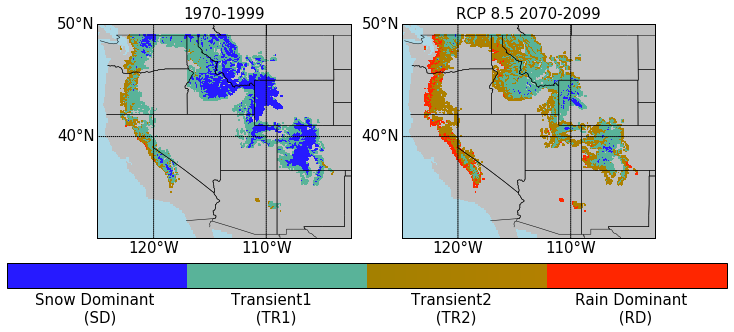

In [5]:
basins = ["cascades","california","northernrockies","southernrockies","whites"]
scenarios = ['historical','rcp85']
titles = ['1970-1999', 'RCP 8.5 2070-2099']
colors = ['r','g','b','c','y']
lt = 10
rt = 7
# fig = plt.figure(figsize=(20,20))

# fig = plt.subplots(figsize=(10,10),nrows=1, ncols=2)
fig = plt.figure(figsize=(lt,rt))


######################### set fontsize #####################
fs = 15
ls = 18
############################################################

lw = 2.0
num = 0

for scenario in scenarios:
    ax = fig.add_subplot(1,2,num+1)
    m = make_map(fs, label_parallels=True, label_meridians=True)
    for basin in basins: 
        file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin, scenario)
        data = np.load(file)
        if scenario == "historical":
            temp_avg_hist = data['temp_avg']
        else:
            temp_avg_hist = data['temp_avg_2070_2099']
        lats = data['lats']
        lons = data['lons']

        # cutoffs 
        rd_cut = 278.15
        tr_cut = 273.15
        sd_cut = 267.15

        ## 1 for SD, 2 for TR1, 3 for TR2, 4 for RD 
        cf = np.ndarray(shape=len(lats),dtype='float')
        cf[temp_avg_hist <= sd_cut] = 0 ## SD
        cf[(temp_avg_hist > sd_cut) & (temp_avg_hist <= tr_cut)] = 0.33 ## TR1
        cf[(temp_avg_hist > tr_cut) & (temp_avg_hist < rd_cut)] = 0.66 ## TR2
        cf[temp_avg_hist >= rd_cut] = 1 ## RD


        lons_mesh, lats_mesh, data_mesh = mesh_gridify(lats.reshape(len(lats),1),
                                                     lons.reshape(len(lons),1),
                                                     cf.reshape(len(cf),1)) 
        cs = m.pcolormesh(lons_mesh, lats_mesh, data_mesh, shading='flat', cmap=discmap,
                          latlon=True, zorder=1, vmin=0,vmax=1)
    
    

        # fig.text(0.045, 0.5, 'Fraction of Area', va='center', rotation='vertical',size = fs)
    ax.set_title(titles[num], size=fs)
    
    num += 1 

from pylab import * 
# subplots_adjust(bottom=0.02, right=0.9, top=1.0)
cax = axes([0.0, 0.2, 1.0, 0.05])
cbar = plt.colorbar(cax=cax, orientation='horizontal')
cbar.set_ticks([0.125, 0.37, 0.62, 0.87])

cax.tick_params(axis=u'both', which=u'both',length=0)

cbar.ax.set_xticklabels(('Snow Dominant \n (SD)', 'Transient1 \n (TR1)', 
                         'Transient2 \n (TR2)' , 'Rain Dominant \n (RD)'),
                        size=fs)
    
plotname = 'RD_TR_SD_map.tiff' 
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/'
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" %savepath)
plt.savefig(savepath, format='tiff', dpi=600)